# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import sys
print(sys.executable)

/Users/yanlinglin/opt/anaconda3/envs/drlnd/bin/python


In [2]:
import torch
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 
consider several improvements: 
- 1: a.basic Q model, b.Q model with more neurons
- 2: a.fixed DQN, b.double DQN
- 3: a.buffer replay and b.prioritized replay

In [7]:
def dqn(version,n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]         
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
#             next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), version+ '_checkpoint.pth')
            break
    torch.save(agent.qnetwork_local.state_dict(), version+ '_checkpoint.pth')
    return scores

In [8]:
# plot the scores
def plot_dqn(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

Episode 100	Average Score: 1.26
Episode 200	Average Score: 4.93
Episode 300	Average Score: 8.20
Episode 400	Average Score: 10.62
Episode 500	Average Score: 12.49
Episode 600	Average Score: 14.37
Episode 679	Average Score: 15.02
Environment solved in 579 episodes!	Average Score: 15.02


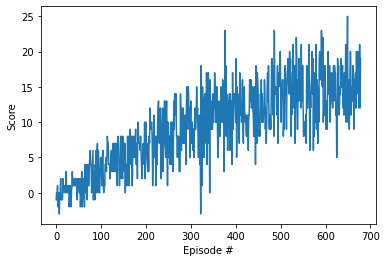

In [9]:
# trial 1: basic version aaa
version='baseline'
from baseline_dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)
scores = dqn(version)
plot_dqn(scores)

Episode 100	Average Score: 0.22
Episode 200	Average Score: 3.38
Episode 300	Average Score: 7.23
Episode 400	Average Score: 9.51
Episode 500	Average Score: 13.03
Episode 600	Average Score: 14.38
Episode 623	Average Score: 15.08
Environment solved in 523 episodes!	Average Score: 15.08


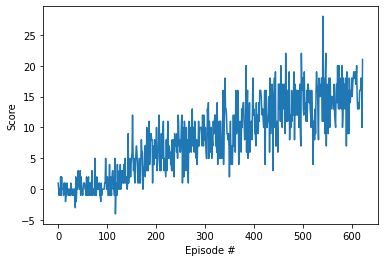

In [11]:
# trial 2: double DQN   aba
version='double_Q_agent_base_replay'
from double_Q_agent_base_replay import Agent
agent = Agent(state_size=37, action_size=4, seed=0)
scores = dqn(version)
plot_dqn(scores)

Episode 100	Average Score: 0.45
Episode 200	Average Score: 3.28
Episode 300	Average Score: 6.82
Episode 400	Average Score: 7.87
Episode 500	Average Score: 9.69
Episode 600	Average Score: 10.32
Episode 700	Average Score: 12.53
Episode 800	Average Score: 13.30
Episode 900	Average Score: 13.01
Episode 1000	Average Score: 13.48


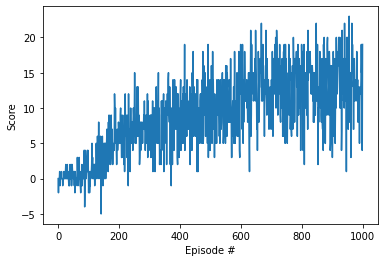

In [12]:
# trial 3: double DQN, prioritized replay. 
version='double_Q_agent_prio_replay'
from double_Q_agent_prio_replay import Agent
agent = Agent(state_size=37, action_size=4, seed=0)
scores = dqn(version)
plot_dqn(scores)

In [13]:
# load the weights from file
def let_agent_play(version_name):
    version = version_name
    agent.qnetwork_local.load_state_dict(torch.load(version+'_checkpoint.pth'))
    max_t=1000
    eps_end=0.01
    play_episodes=100
    play_scores = []                        # list containing scores from each episode
    play_scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, play_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]         
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps_end)
    #             next_state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
    #             agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        play_scores_window.append(score)       # save most recent score
        play_scores.append(score)              # save most recent score
    #         eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(play_scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(play_scores_window)))
    return play_scores

Episode 100	Average Score: 14.37


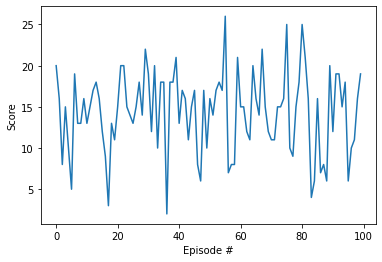

In [14]:
version='baseline'
from baseline_dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)
play_scores=[]
play_scores=let_agent_play('baseline')
plot_dqn(play_scores)

In [15]:
env.close()